**Importing Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-773bc05a73a7>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")




**Model Buildidng**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

**Loading DATA**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_excel(r"/content/drive/MyDrive/1st May Final Sem Thesis/AnuK.Dataset_SVR.xlsx")
df

,MIC_Value,pMIC,apol,nAtom,ATS2p,AATS1m,ATSC4p,ATSC7i,ATSC2s,ATSC5s,...,maxHBint1,maxaaN,ETA_Beta_ns,nAtomLC,nAtomP,MPC3,SpMAD_D,WTPT-1,PubchemFP2,PubchemFP516
0,4.88,5.311580,57.578600,48,153.443662,18.984384,-1.933749,-24.356194,114.413947,7.891962,...,0.0,0.000000,14.0,5,13,57,1.244499,56.315512,1,1
1,1250.00,2.903090,57.578600,48,153.443662,18.984384,-3.135230,-5.145417,113.719496,-45.984488,...,0.0,0.000000,14.0,5,13,58,9.848546,56.317929,1,1
2,156.20,3.806319,58.372860,49,153.729368,11.694178,-0.637495,1.489729,14.717597,-35.968788,...,0.0,0.000000,14.0,6,13,58,11.158687,58.317931,1,1
3,2.44,5.612610,58.372860,49,153.729368,11.694178,-0.196153,-27.322751,14.828178,-4.562626,...,0.0,0.000000,14.0,6,13,58,1.744451,58.318757,1,1
4,9.76,5.010550,58.372860,49,153.729368,11.694178,-1.373478,-53.473434,14.133726,-59.381843,...,0.0,0.000000,14.0,6,13,59,1.355962,58.321647,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1.22,5.913640,54.286274,44,139.666450,15.759666,-3.617636,1.969200,0.616318,8.793470,...,0.0,4.135537,16.5,0,13,59,1.321312,53.599565,1,1
93,1.22,5.913640,54.286274,44,139.666450,15.759666,-4.522327,-0.449279,0.552733,12.153365,...,0.0,4.134379,16.5,0,13,59,1.462412,53.613651,1,1
94,19.53,4.709298,55.882740,45,137.161155,18.557671,-4.814497,8.983563,-3.917183,-2.694761,...,0.0,4.132546,17.0,1,13,62,1.532775,55.625880,1,1
95,1.22,5.913640,55.882740,45,137.161155,18.557671,-5.972628,3.698876,-2.639459,9.191838,...,0.0,4.131763,17.0,1,13,61,1.776911,55.623590,1,1


In [ ]:
print(df.columns)

Index(['MIC_Value', 'pMIC', 'apol', 'nAtom', 'ATS2p', 'AATS1m', 'ATSC4p',
       'ATSC7i', 'ATSC2s', 'ATSC5s', 'AATSCm', 'AATSC7m', 'AATSC8m', 'AATSC1v',
       'AATSC6v', 'AATSC8v', 'AATSC8p', 'AATSC5i', 'AATSC7s', 'MATS3v',
       'MATS5e', 'MATS6s', 'GATS7s', 'SpAbs_DzZ', 'SpAbs_Dzm', 'SpDiam_Dzp',
       'EE_Dzs', 'nBondsS', 'nBondsS3', 'C1SP3', 'SPC-6', 'Sse', 'SpMax_Dt',
       'EE_Dt', 'VE1_Dt', 'VR3_Dt', 'SHBint4', 'SHBint1', 'SdO', 'minHBint4',
       'minHBint1', 'minaaN', 'maxHBint1', 'maxaaN', 'ETA_Beta_ns', 'nAtomLC',
       'nAtomP', 'MPC3', 'SpMAD_D', 'WTPT-1', 'PubchemFP2', 'PubchemFP516'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MIC_Value     97 non-null     float64
 1   pMIC          97 non-null     float64
 2   apol          97 non-null     float64
 3   nAtom         97 non-null     int64  
 4   ATS2p         97 non-null     float64
 5   AATS1m        97 non-null     float64
 6   ATSC4p        97 non-null     float64
 7   ATSC7i        97 non-null     float64
 8   ATSC2s        97 non-null     float64
 9   ATSC5s        97 non-null     float64
 10  AATSCm        97 non-null     float64
 11  AATSC7m       97 non-null     float64
 12  AATSC8m       97 non-null     float64
 13  AATSC1v       97 non-null     float64
 14  AATSC6v       97 non-null     float64
 15  AATSC8v       97 non-null     float64
 16  AATSC8p       97 non-null     float64
 17  AATSC5i       97 non-null     float64
 18  AATSC7s       97 non-null     fl

**Checking for Null Values**

In [ ]:
df.isnull()

,MIC_Value,pMIC,apol,nAtom,ATS2p,AATS1m,ATSC4p,ATSC7i,ATSC2s,ATSC5s,...,maxHBint1,maxaaN,ETA_Beta_ns,nAtomLC,nAtomP,MPC3,SpMAD_D,WTPT-1,PubchemFP2,PubchemFP516
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
93,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
94,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
95,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

MIC_Value        0
pMIC             0
apol             0
nAtom            0
ATS2p            0
AATS1m           0
ATSC4p           0
ATSC7i           0
ATSC2s           0
ATSC5s           0
AATSCm           0
AATSC7m          0
AATSC8m          0
AATSC1v          0
AATSC6v          0
AATSC8v          0
AATSC8p          0
AATSC5i          0
AATSC7s          0
MATS3v           0
MATS5e           0
MATS6s           0
GATS7s           0
SpAbs_DzZ        0
SpAbs_Dzm        0
SpDiam_Dzp       0
EE_Dzs           0
nBondsS          0
nBondsS3         0
C1SP3            0
SPC-6           80
Sse              0
SpMax_Dt         0
EE_Dt            0
VE1_Dt           0
VR3_Dt           0
SHBint4          0
SHBint1          0
SdO              0
minHBint4        0
minHBint1        0
minaaN           0
maxHBint1        0
maxaaN           0
ETA_Beta_ns      0
nAtomLC          0
nAtomP           0
MPC3             0
SpMAD_D          0
WTPT-1           0
PubchemFP2       0
PubchemFP516     0
dtype: int64

In [ ]:
df.isnull().sum().sum()

80

In [ ]:
df2 = df.fillna(value = 0)
df2

,MIC_Value,pMIC,apol,nAtom,ATS2p,AATS1m,ATSC4p,ATSC7i,ATSC2s,ATSC5s,...,maxHBint1,maxaaN,ETA_Beta_ns,nAtomLC,nAtomP,MPC3,SpMAD_D,WTPT-1,PubchemFP2,PubchemFP516
0,4.88,5.311580,57.578600,48,153.443662,18.984384,-1.933749,-24.356194,114.413947,7.891962,...,0.0,0.000000,14.0,5,13,57,1.244499,56.315512,1,1
1,1250.00,2.903090,57.578600,48,153.443662,18.984384,-3.135230,-5.145417,113.719496,-45.984488,...,0.0,0.000000,14.0,5,13,58,9.848546,56.317929,1,1
2,156.20,3.806319,58.372860,49,153.729368,11.694178,-0.637495,1.489729,14.717597,-35.968788,...,0.0,0.000000,14.0,6,13,58,11.158687,58.317931,1,1
3,2.44,5.612610,58.372860,49,153.729368,11.694178,-0.196153,-27.322751,14.828178,-4.562626,...,0.0,0.000000,14.0,6,13,58,1.744451,58.318757,1,1
4,9.76,5.010550,58.372860,49,153.729368,11.694178,-1.373478,-53.473434,14.133726,-59.381843,...,0.0,0.000000,14.0,6,13,59,1.355962,58.321647,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1.22,5.913640,54.286274,44,139.666450,15.759666,-3.617636,1.969200,0.616318,8.793470,...,0.0,4.135537,16.5,0,13,59,1.321312,53.599565,1,1
93,1.22,5.913640,54.286274,44,139.666450,15.759666,-4.522327,-0.449279,0.552733,12.153365,...,0.0,4.134379,16.5,0,13,59,1.462412,53.613651,1,1
94,19.53,4.709298,55.882740,45,137.161155,18.557671,-4.814497,8.983563,-3.917183,-2.694761,...,0.0,4.132546,17.0,1,13,62,1.532775,55.625880,1,1
95,1.22,5.913640,55.882740,45,137.161155,18.557671,-5.972628,3.698876,-2.639459,9.191838,...,0.0,4.131763,17.0,1,13,61,1.776911,55.623590,1,1


In [ ]:
df2.isnull().sum().sum()

0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MIC_Value     97 non-null     float64
 1   pMIC          97 non-null     float64
 2   apol          97 non-null     float64
 3   nAtom         97 non-null     int64  
 4   ATS2p         97 non-null     float64
 5   AATS1m        97 non-null     float64
 6   ATSC4p        97 non-null     float64
 7   ATSC7i        97 non-null     float64
 8   ATSC2s        97 non-null     float64
 9   ATSC5s        97 non-null     float64
 10  AATSCm        97 non-null     float64
 11  AATSC7m       97 non-null     float64
 12  AATSC8m       97 non-null     float64
 13  AATSC1v       97 non-null     float64
 14  AATSC6v       97 non-null     float64
 15  AATSC8v       97 non-null     float64
 16  AATSC8p       97 non-null     float64
 17  AATSC5i       97 non-null     float64
 18  AATSC7s       97 non-null     fl

In [ ]:
df2.describe()

,MIC_Value,pMIC,apol,nAtom,ATS2p,AATS1m,ATSC4p,ATSC7i,ATSC2s,ATSC5s,...,maxHBint1,maxaaN,ETA_Beta_ns,nAtomLC,nAtomP,MPC3,SpMAD_D,WTPT-1,PubchemFP2,PubchemFP516
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,428.014124,4.004860,45.843365,37.371134,92.485642,66.676420,-2.558734,-4.725199,14.512309,-2.055567,...,0.076766,1.318209,14.432990,2.525773,15.917526,45.000000,7.403260,41.618424,0.525773,0.907216
std,481.040406,1.039166,13.081367,10.385607,52.570678,53.035725,2.460804,17.258652,36.143451,22.121769,...,0.756061,1.982368,3.725356,2.345620,5.116701,15.942605,3.503156,16.150128,0.501929,0.291636
min,1.220000,2.903090,4.289723,3.000000,1.549197,11.172634,-7.675867,-72.796193,-7.389429,-66.128629,...,0.000000,0.000000,2.000000,0.000000,1.000000,4.000000,1.119262,4.563729,0.000000,0.000000
25%,19.530000,3.204120,44.242930,34.000000,19.657273,15.619964,-3.896479,-9.713695,-1.519471,-7.281268,...,0.000000,0.000000,13.000000,1.000000,13.000000,43.000000,7.444747,39.691657,0.000000,1.000000
50%,156.250000,3.806180,46.186688,38.000000,113.927892,19.141520,-3.119636,-3.388221,2.312483,4.251876,...,0.000000,0.000000,14.000000,2.000000,16.000000,48.000000,8.662435,44.659531,1.000000,1.000000
75%,625.000000,4.709298,52.526274,43.000000,126.696670,119.653872,-1.117465,1.819852,8.446381,11.723850,...,0.000000,4.134379,17.000000,4.000000,19.000000,54.000000,9.377529,52.514512,1.000000,1.000000
max,1250.000000,5.913640,74.798790,64.000000,174.982358,146.774727,5.571667,35.197719,177.393143,27.629427,...,7.446337,4.872161,19.500000,9.000000,22.000000,72.000000,13.948738,68.551727,1.000000,1.000000


**Input and Output Preparation**

In [ ]:
X = df2.drop(['pMIC'],axis = 1)
X

,MIC_Value,apol,nAtom,ATS2p,AATS1m,ATSC4p,ATSC7i,ATSC2s,ATSC5s,AATSCm,...,maxHBint1,maxaaN,ETA_Beta_ns,nAtomLC,nAtomP,MPC3,SpMAD_D,WTPT-1,PubchemFP2,PubchemFP516
0,4.88,57.578600,48,153.443662,18.984384,-1.933749,-24.356194,114.413947,7.891962,5.281264,...,0.0,0.000000,14.0,5,13,57,1.244499,56.315512,1,1
1,1250.00,57.578600,48,153.443662,18.984384,-3.135230,-5.145417,113.719496,-45.984488,5.281264,...,0.0,0.000000,14.0,5,13,58,9.848546,56.317929,1,1
2,156.20,58.372860,49,153.729368,11.694178,-0.637495,1.489729,14.717597,-35.968788,5.311216,...,0.0,0.000000,14.0,6,13,58,11.158687,58.317931,1,1
3,2.44,58.372860,49,153.729368,11.694178,-0.196153,-27.322751,14.828178,-4.562626,5.311216,...,0.0,0.000000,14.0,6,13,58,1.744451,58.318757,1,1
4,9.76,58.372860,49,153.729368,11.694178,-1.373478,-53.473434,14.133726,-59.381843,5.311216,...,0.0,0.000000,14.0,6,13,59,1.355962,58.321647,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1.22,54.286274,44,139.666450,15.759666,-3.617636,1.969200,0.616318,8.793470,49.676656,...,0.0,4.135537,16.5,0,13,59,1.321312,53.599565,1,1
93,1.22,54.286274,44,139.666450,15.759666,-4.522327,-0.449279,0.552733,12.153365,49.676656,...,0.0,4.134379,16.5,0,13,59,1.462412,53.613651,1,1
94,19.53,55.882740,45,137.161155,18.557671,-4.814497,8.983563,-3.917183,-2.694761,49.847288,...,0.0,4.132546,17.0,1,13,62,1.532775,55.625880,1,1
95,1.22,55.882740,45,137.161155,18.557671,-5.972628,3.698876,-2.639459,9.191838,49.847288,...,0.0,4.131763,17.0,1,13,61,1.776911,55.623590,1,1


In [ ]:
Y = df2.pMIC
Y

0     5.311580
1     2.903090
2     3.806319
3     5.612610
4     5.010550
        ...   
92    5.913640
93    5.913640
94    4.709298
95    5.913640
96    5.311580
Name: pMIC, Length: 97, dtype: float64

In [ ]:
X.shape

(97, 51)

In [ ]:
Y.shape

(97,)

In [ ]:
corr = X.corr()

In [ ]:
corr

,MIC_Value,apol,nAtom,ATS2p,AATS1m,ATSC4p,ATSC7i,ATSC2s,ATSC5s,AATSCm,...,maxHBint1,maxaaN,ETA_Beta_ns,nAtomLC,nAtomP,MPC3,SpMAD_D,WTPT-1,PubchemFP2,PubchemFP516
MIC_Value,1.000000,0.131898,0.121773,0.181220,0.160857,0.036335,0.109871,0.239306,-0.044218,0.024740,...,0.175306,-0.227578,0.119129,-0.020232,0.204535,0.052775,0.218187,-0.074341,-0.057510,0.156596
apol,0.131898,1.000000,0.419225,0.261785,-0.181599,0.100191,0.100939,0.249635,-0.143820,-0.204595,...,-0.012763,0.115256,0.349256,0.197745,-0.077668,0.265126,-0.078209,0.144659,0.390928,0.093349
nAtom,0.121773,0.419225,1.000000,0.255443,-0.008490,0.041429,0.063950,0.298772,-0.274053,-0.125199,...,-0.043179,0.067587,0.318749,0.305766,-0.014904,0.184963,-0.154624,0.142702,0.311874,0.056197
ATS2p,0.181220,0.261785,0.255443,1.000000,-0.114972,0.127403,-0.059590,0.099890,-0.065864,-0.332450,...,0.041086,-0.026538,0.224364,0.213187,-0.131990,0.226110,-0.255361,0.111315,0.169784,0.075878
AATS1m,0.160857,-0.181599,-0.008490,-0.114972,1.000000,0.083164,-0.133014,0.101132,-0.043884,0.323185,...,0.154942,0.055392,0.093416,-0.020732,0.439285,0.002830,0.115264,-0.180626,-0.385396,0.104154
ATSC4p,0.036335,0.100191,0.041429,0.127403,0.083164,1.000000,-0.086168,0.248736,-0.176729,-0.360310,...,0.023511,0.421261,0.416532,0.432764,0.415187,0.205272,-0.020139,0.030207,-0.193638,0.403241
ATSC7i,0.109871,0.100939,0.063950,-0.059590,-0.133014,-0.086168,1.000000,-0.155766,0.066291,0.049986,...,0.101917,-0.010317,0.144939,0.033345,-0.083481,-0.236808,0.311916,0.040995,0.233021,-0.156981
ATSC2s,0.239306,0.249635,0.298772,0.099890,0.101132,0.248736,-0.155766,1.000000,-0.429917,-0.162279,...,0.005314,0.060815,0.194692,0.282779,0.119907,0.158362,0.021858,-0.121752,0.064758,0.104502
ATSC5s,-0.044218,-0.143820,-0.274053,-0.065864,-0.043884,-0.176729,0.066291,-0.429917,1.000000,0.243518,...,-0.058077,-0.101156,-0.061552,-0.578801,0.033455,-0.188626,0.123127,0.037517,-0.186989,0.207179
AATSCm,0.024740,-0.204595,-0.125199,-0.332450,0.323185,-0.360310,0.049986,-0.162279,0.243518,1.000000,...,0.010149,-0.417361,-0.247546,-0.382039,-0.021322,-0.384962,0.198136,0.051006,-0.003529,-0.120396


In [ ]:
corr.style.background_gradient(cmap='coolwarm')

,MIC_Value,apol,nAtom,ATS2p,AATS1m,ATSC4p,ATSC7i,ATSC2s,ATSC5s,AATSCm,AATSC7m,AATSC8m,AATSC1v,AATSC6v,AATSC8v,AATSC8p,AATSC5i,AATSC7s,MATS3v,MATS5e,MATS6s,GATS7s,SpAbs_DzZ,SpAbs_Dzm,SpDiam_Dzp,EE_Dzs,nBondsS,nBondsS3,C1SP3,SPC-6,Sse,SpMax_Dt,EE_Dt,VE1_Dt,VR3_Dt,SHBint4,SHBint1,SdO,minHBint4,minHBint1,minaaN,maxHBint1,maxaaN,ETA_Beta_ns,nAtomLC,nAtomP,MPC3,SpMAD_D,WTPT-1,PubchemFP2,PubchemFP516
MIC_Value,1.000000,0.131898,0.121773,0.181220,0.160857,0.036335,0.109871,0.239306,-0.044218,0.024740,-0.002238,-0.116734,0.342008,0.023058,-0.163748,-0.268388,0.254590,0.196345,0.142816,0.107918,-0.061436,0.169167,0.123594,0.165118,-0.230987,0.257085,0.031410,-0.026363,-0.165944,-0.016134,0.218537,0.052332,0.052332,-0.044367,0.206203,0.173249,0.175306,-0.013860,0.132427,0.175306,-0.227544,0.175306,-0.227578,0.119129,-0.020232,0.204535,0.052775,0.218187,-0.074341,-0.057510,0.156596
apol,0.131898,1.000000,0.419225,0.261785,-0.181599,0.100191,0.100939,0.249635,-0.143820,-0.204595,0.014957,-0.025599,0.093326,0.031005,0.087957,0.106615,-0.031020,0.068457,0.189478,0.207255,-0.140963,-0.104186,0.269515,0.308656,0.233880,0.445191,0.281161,0.076970,0.192213,0.280356,0.249780,0.359673,0.359673,-0.027038,0.384050,-0.104171,-0.012763,0.120216,-0.227593,-0.012763,0.115147,-0.012763,0.115256,0.349256,0.197745,-0.077668,0.265126,-0.078209,0.144659,0.390928,0.093349
nAtom,0.121773,0.419225,1.000000,0.255443,-0.008490,0.041429,0.063950,0.298772,-0.274053,-0.125199,0.139352,0.124960,-0.031786,-0.159791,0.139356,0.114592,-0.039125,0.053637,0.277783,-0.004554,-0.068937,-0.202359,0.238150,0.273957,0.129254,0.444860,0.263846,0.062601,0.322966,0.168759,0.726858,0.401942,0.401942,0.041444,0.400588,-0.011272,-0.043179,0.081813,-0.167395,-0.043179,0.067449,-0.043179,0.067587,0.318749,0.305766,-0.014904,0.184963,-0.154624,0.142702,0.311874,0.056197
ATS2p,0.181220,0.261785,0.255443,1.000000,-0.114972,0.127403,-0.059590,0.099890,-0.065864,-0.332450,0.026223,0.043137,0.337417,-0.053714,0.042206,-0.032348,0.080320,-0.116787,0.292165,0.115876,-0.029884,-0.078976,0.168970,0.207155,0.135894,0.364574,0.176955,0.040637,0.252919,0.398797,0.076953,0.249528,0.249528,-0.095206,0.322898,-0.268590,0.041086,0.049766,-0.180610,0.041086,-0.026706,0.041086,-0.026538,0.224364,0.213187,-0.131990,0.226110,-0.255361,0.111315,0.169784,0.075878
AATS1m,0.160857,-0.181599,-0.008490,-0.114972,1.000000,0.083164,-0.133014,0.101132,-0.043884,0.323185,-0.017427,0.059547,0.166693,-0.017751,-0.095557,-0.139526,0.210992,-0.078681,-0.149926,-0.265301,-0.026329,-0.037683,0.111945,0.090841,-0.091749,-0.131639,-0.024669,-0.210493,-0.426585,-0.046235,0.160291,0.146873,0.146873,-0.235390,0.083173,0.331286,0.154942,0.109059,0.280406,0.154942,0.055310,0.154942,0.055392,0.093416,-0.020732,0.439285,0.002830,0.115264,-0.180626,-0.385396,0.104154
ATSC4p,0.036335,0.100191,0.041429,0.127403,0.083164,1.000000,-0.086168,0.248736,-0.176729,-0.360310,-0.208175,0.062012,0.357582,0.034892,0.211076,0.143311,0.283402,-0.311833,-0.071683,0.038925,-0.373562,-0.083187,0.237898,0.203667,0.129223,0.085130,0.177145,-0.100346,-0.285906,0.077082,-0.012475,0.153445,0.153445,-0.080338,0.100530,0.259628,0.023511,0.425436,0.460247,0.023511,0.421087,0.023511,0.421261,0.416532,0.432764,0.415187,0.205272,-0.020139,0.030207,-0.193638,0.403241
ATSC7i,0.109871,0.100939,0.063950,-0.059590,-0.133014,-0.086168,1.000000,-0.155766,0.066291,0.049986,0.341814,0.124204,-0.358184,-0.067700,0.344009,0.233684,-0.212183,0.222286,0.152827,0.162153,-0.227195,-0.259911,0.154442,0.113913,0.132472,0.067598,-0.078387,0.107325,-0.081082,-0.294118,0.169736,-0.156150,-0.156150,0.082453,0.018423,-0.046421,0.101917,0.175468,-0.104328,0.101917,-0.010516,0.101917,-0.010317,0.144939,0.033345,-0.083481,-0.236808,0.311916,0.040995,0.233021,-0.156981
ATSC2s,0.239306,0.249635,0.298772,0.099890,0.101132,0.248736,-0.155766,1.000000,-0.429917,-0.162279,-0.177229,0.105731,0.317424,-0.058692,-0.021627,-0.060689,-0.019395,-0.259722,0.149639,-0.130047,-0.125858,-0.155240,0.

**Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=42)

In [ ]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(77, 51) (20, 51) (77,) (20,)


In [ ]:
X_train

,MIC_Value,apol,nAtom,ATS2p,AATS1m,ATSC4p,ATSC7i,ATSC2s,ATSC5s,AATSCm,...,maxHBint1,maxaaN,ETA_Beta_ns,nAtomLC,nAtomP,MPC3,SpMAD_D,WTPT-1,PubchemFP2,PubchemFP516
49,4.88,42.291120,34,99.193770,121.619414,-3.385887,-11.373920,-0.763628,2.271837,182.435527,...,0.0,0.000000,13.0,1,16,41,7.969715,39.691657,0,1
70,1250.00,45.895160,36,111.583137,113.428496,-3.119636,-1.395523,-1.917353,1.155385,32.648878,...,0.0,4.387585,2.0,1,22,6,8.482865,49.774322,0,1
68,312.50,44.215930,33,113.538841,146.774727,-1.273393,-0.327144,16.495521,3.335952,65.395543,...,0.0,0.000000,14.5,2,18,49,9.637957,46.664186,0,1
15,78.12,44.572390,35,11.842360,11.674714,-0.362920,-14.825915,2.326566,19.519556,52.343749,...,0.0,4.245144,17.0,0,19,47,8.662435,44.653829,0,1
39,625.00,45.316688,38,12.466631,15.914695,-5.396375,-12.687627,-1.573561,8.918924,54.653786,...,0.0,0.000000,13.5,1,17,45,8.896786,43.565295,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,312.50,41.759516,33,12.723660,131.899710,-3.187560,-7.655682,0.328745,7.529825,183.793520,...,0.0,0.000000,12.5,0,17,47,8.453854,42.562738,0,1
71,156.50,56.661860,47,142.972171,97.151214,1.618841,15.391936,2.799474,25.658599,33.843634,...,0.0,4.451519,19.5,7,21,59,11.475985,55.925239,1,1
14,39.06,47.713700,38,116.958897,138.998478,0.764184,-72.796193,177.393143,-31.634427,51.568723,...,0.0,4.261957,17.0,3,19,61,1.455856,57.769227,0,1
92,1.22,54.286274,44,139.666450,15.759666,-3.617636,1.969200,0.616318,8.793470,49.676656,...,0.0,4.135537,16.5,0,13,59,1.321312,53.599565,1,1


In [ ]:
Y_train

49    5.311580
70    2.903090
68    3.505150
15    4.107238
39    3.204120
        ...   
60    3.505150
71    3.805486
14    4.408268
92    5.913640
51    3.505150
Name: pMIC, Length: 77, dtype: float64

In [ ]:
X_test

,MIC_Value,apol,nAtom,ATS2p,AATS1m,ATSC4p,ATSC7i,ATSC2s,ATSC5s,AATSCm,...,maxHBint1,maxaaN,ETA_Beta_ns,nAtomLC,nAtomP,MPC3,SpMAD_D,WTPT-1,PubchemFP2,PubchemFP516
62,78.12,5.822740,42,111.551372,117.982850,-5.824734,17.454335,-4.115187,-1.757650,156.982853,...,0.0,0.000000,14.0,1,18,5,9.336287,47.432714,1,0
40,19.53,45.316688,38,12.466631,15.914695,-4.999346,-3.398593,-1.573561,7.214272,54.653786,...,0.0,0.000000,13.5,1,17,45,8.623481,43.565791,1,1
93,1.22,54.286274,44,139.666450,15.759666,-4.522327,-0.449279,0.552733,12.153365,49.676656,...,0.0,4.134379,16.5,0,13,59,1.462412,53.613651,1,1
18,1.22,52.526274,43,126.475332,13.563128,-4.828664,0.355435,1.217118,26.291755,5.514695,...,0.0,4.872161,17.5,5,2,53,1.345793,5.679146,1,1
81,1250.00,41.887516,32,113.927892,133.981292,-4.339918,-19.139225,0.985289,16.881629,7.892781,...,0.0,0.000000,12.5,1,16,48,7.444747,4.752197,0,1
83,1250.00,41.855160,31,115.774448,13.766669,-6.143848,-17.782863,3.645170,18.971420,71.823713,...,0.0,0.000000,12.0,0,15,46,7.632513,38.726675,0,1
64,1250.00,47.531200,38,113.181614,113.481282,-3.313555,7.874985,-5.833874,12.552678,52.589340,...,0.0,0.000000,18.0,1,21,51,9.287124,48.713711,0,1
42,312.50,48.434810,4,122.346874,14.317823,-5.179242,4.479754,4.622757,-3.122758,53.159640,...,0.0,0.000000,12.0,0,8,54,8.657384,46.236382,1,0
10,1250.00,44.242930,35,19.886869,128.194935,-1.664283,-29.789295,96.617112,-66.128629,53.257819,...,0.0,4.177124,17.0,3,19,54,9.274855,5.288259,0,1
0,4.88,57.578600,48,153.443662,18.984384,-1.933749,-24.356194,114.413947,7.891962,5.281264,...,0.0,0.000000,14.0,5,13,57,1.244499,56.315512,1,1


In [ ]:
Y_test

62    4.107238
40    4.709298
93    5.913640
18    5.913640
81    2.903090
83    2.903090
64    2.903090
42    3.505150
10    2.903090
0     5.311580
31    4.107238
75    3.204120
47    2.903090
26    4.107238
44    4.408268
4     5.010550
22    3.806180
12    3.505150
89    3.806180
73    5.913640
Name: pMIC, dtype: float64

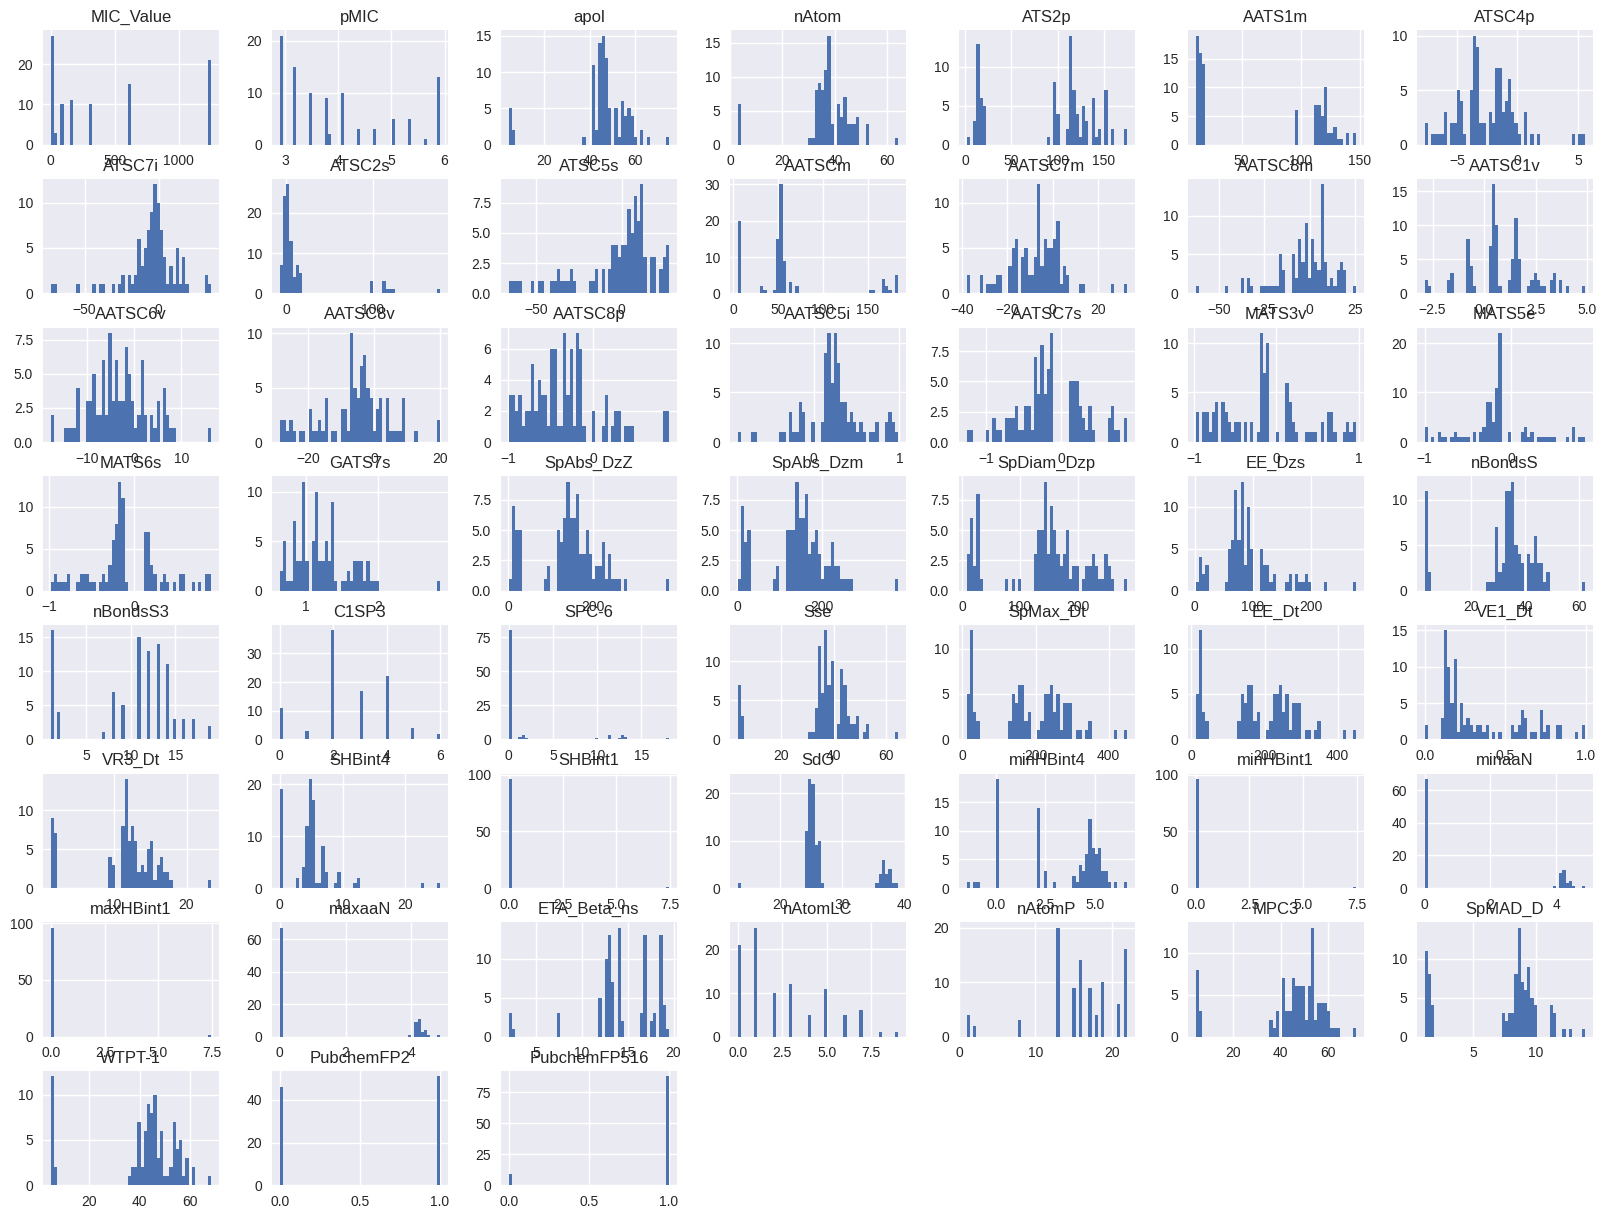

In [ ]:
df2.hist(bins = 50, figsize=(20,15))
plt.savefig('figsvr1.png')
plt.show()

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train
X_test

array([[-0.64539223, -3.65931251,  0.46883815, ...,  0.64024942,
         1.        , -2.38047614],
       [-0.76065366, -0.0917457 ,  0.13982892, ...,  0.44505476,
         1.        ,  0.42008403],
       [-0.79667409,  0.71849483,  0.63334277, ...,  0.952251  ,
         1.        ,  0.42008403],
       ...,
       [-0.18430714, -0.1887404 , -0.106928  , ..., -1.48730874,
        -1.        ,  0.42008403],
       [-0.49169064,  0.44864391,  0.38658585, ...,  0.89676863,
        -1.        ,  0.42008403],
       [-0.79667409, -0.2712509 , -0.106928  , ...,  0.61007209,
        -1.        ,  0.42008403]])

**Initiation of Support Vector Regressor**

In [ ]:
model = SVR()

In [ ]:
model.fit(X_train, Y_train)

SVR()

In [ ]:
Y_train_pred = model.predict(X_train)

In [ ]:
print(Y_train_pred)

[4.58737709 3.003191   3.54630405 4.00757511 3.30447522 4.46195739
 4.91045307 3.00307721 4.06957614 3.0032098  5.27043592 3.30399041
 4.00701227 3.89179892 3.77904214 3.00336629 3.00303159 3.88178318
 4.00677569 4.52865541 4.08483813 5.08599886 3.00296025 3.9058484
 4.62769112 3.90655357 3.8753217  2.96580363 3.60553014 3.00302898
 4.64614464 4.06973509 3.30419405 4.91056023 4.69173144 3.00293007
 3.90623594 3.30370853 4.00713169 3.47203989 4.88116223 3.30405798
 3.45802194 3.60505571 3.60537565 3.00310002 3.00317969 4.0581821
 4.96103497 4.50122302 4.00703105 3.41882697 3.00283415 3.00327738
 3.3036532  3.90515783 5.5716639  4.30815521 2.90246268 5.14052684
 3.40446766 3.30404339 3.0031445  4.14336431 4.55016071 3.90639653
 3.60523043 3.4094049  4.64403189 3.41737046 3.30422993 3.08916105
 3.60531133 3.90536537 4.30876803 5.59337015 3.47435767]


In [ ]:
predictions1 = pd.DataFrame({'Y_train' : Y_train, 'Y_train_pred' : Y_train_pred})

In [ ]:
predictions1

,Y_train,Y_train_pred
49,5.311580,4.587377
70,2.903090,3.003191
68,3.505150,3.546304
15,4.107238,4.007575
39,3.204120,3.304475
...,...,...
60,3.505150,3.605311
71,3.805486,3.905365
14,4.408268,4.308768
92,5.913640,5.593370


In [ ]:
len(Y_train_pred)

77

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train))

The training r_sq is: 0.7840


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_pred))

The MAE is: 0.2907


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_pred)))

The RMSE is: 0.4796


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_pred))

The EVS is: 0.8034


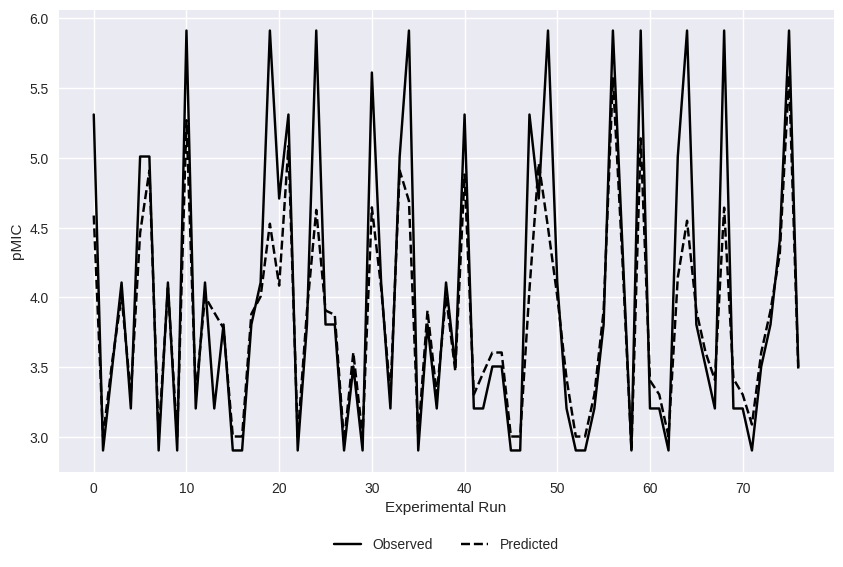

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('pMIC')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

In [ ]:
Y_test_pred = model.predict(X_test)

In [ ]:
Y_test_pred

array([3.89189983, 3.66585742, 5.14744669, 4.55904655, 3.09822906,
       3.33126816, 3.2480249 , 4.09600874, 3.52457959, 3.74860975,
       3.92572564, 4.07580467, 3.30403751, 3.79509794, 4.18918144,
       4.23463058, 3.63699136, 3.84260927, 3.88904966, 4.15476185])

In [ ]:
len(Y_test_pred)

20

In [ ]:
predictions2 = pd.DataFrame({'Y_test' : Y_test, 'Y_test_pred' : Y_test_pred})

In [ ]:
predictions2

,Y_test,Y_test_pred
62,4.107238,3.891900
40,4.709298,3.665857
93,5.913640,5.147447
18,5.913640,4.559047
81,2.903090,3.098229
83,2.903090,3.331268
64,2.903090,3.248025
42,3.505150,4.096009
10,2.903090,3.524580
0,5.311580,3.748610


In [ ]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test))

The testing r_sq is: 0.4403


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_pred))

The MAE is: 0.6116


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

The RMSE is: 0.7752


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_pred))


The EVS is: 0.4872


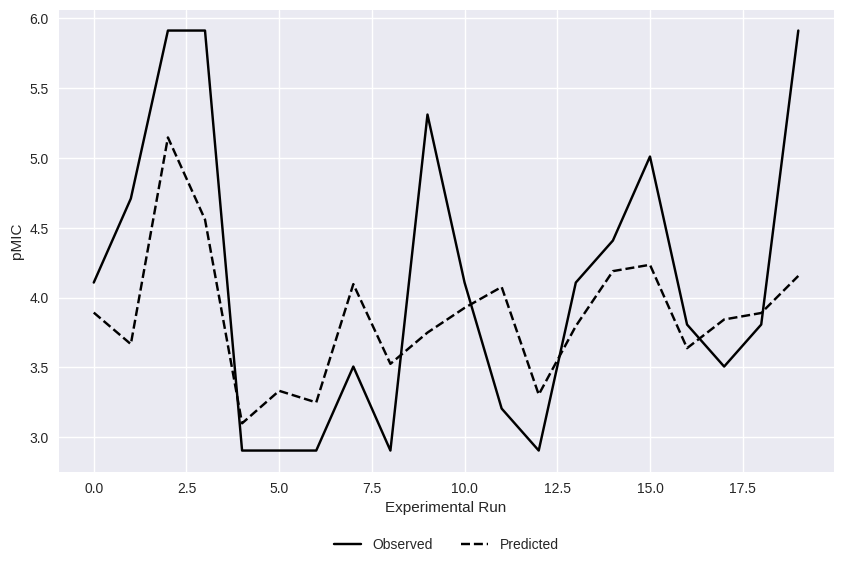

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('pMIC')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)

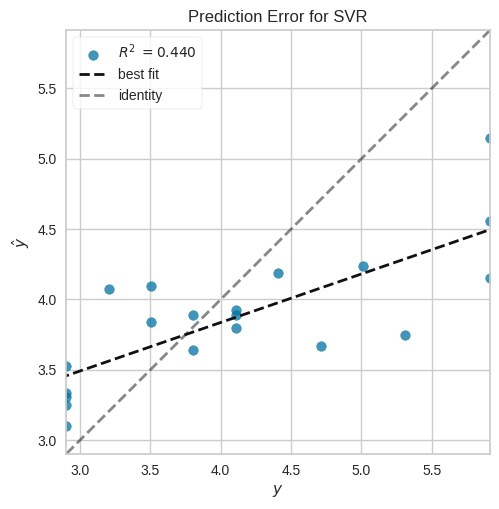

<Axes: title={'center': 'Prediction Error for SVR'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

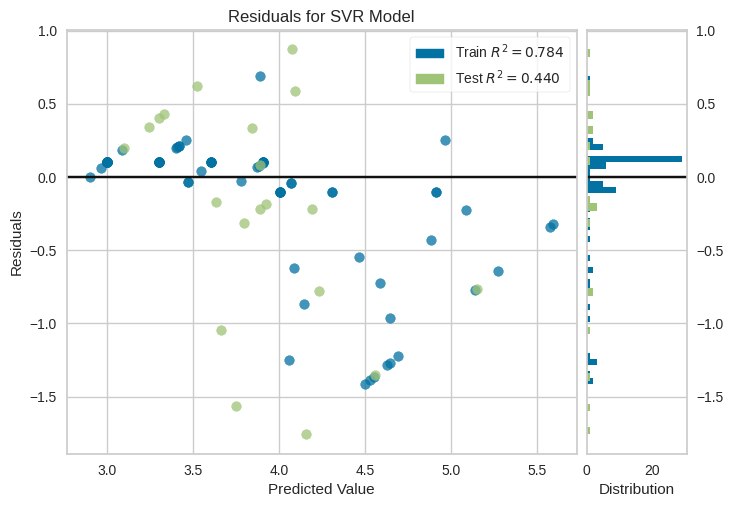

<Axes: title={'center': 'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

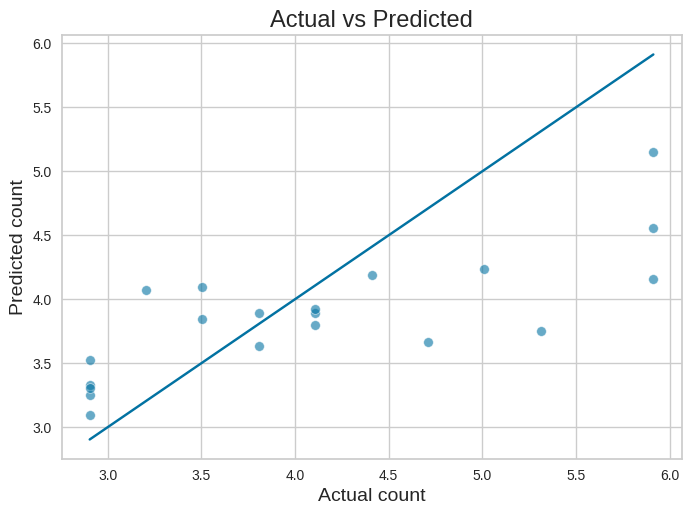

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_pred, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Predicted', fontsize = 17)
plt.show()

In [ ]:
model.score(X_test, Y_test)

0.44031614389111584

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.77

**Using Different Hyperparameters**

In [ ]:
my_param_grid = {'C':[1, 10, 100], 'gamma':[1,0.1,0.01], 'kernel': ['rbf']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
GridSearchCV(estimator=SVR(), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid = GridSearchCV(estimator=SVR(), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

In [ ]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.000 total time=   0.0s
[CV 2/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.097 total time=   0.0s
[CV 3/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.009 total time=   0.0s
[CV 4/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.062 total time=   0.0s
[CV 5/5] END .........C=1, gamma=1, kernel=rbf;, score=-0.037 total time=   0.0s
[CV 1/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.075 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.1, kernel=rbf;, score=-0.028 total time=   0.0s
[CV 3/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.094 total time=   0.0s
[CV 4/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.075 total time=   0.0s
[CV 5/5] END ........C=1, gamma=0.1, kernel=rbf;, score=0.027 total time=   0.0s
[CV 1/5] END .......C=1, gamma=0.01, kernel=rbf;, score=0.385 total time=   0.0s
[CV 2/5] END .......C=1, gamma=0.01, kernel=rbf;,

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

**Test with Hyperparameters**

In [ ]:
Y_test_optimised = grid.predict(X_test)

In [ ]:
Y_test_optimised

array([3.51604793, 3.87410393, 5.57641909, 5.06595597, 2.93515114,
       3.00114778, 3.15538901, 4.87193478, 3.40090256, 4.03210374,
       4.17927721, 5.02611802, 2.82456342, 4.34969535, 4.28353819,
       4.96407168, 3.67217656, 3.88791173, 3.95737122, 4.96638643])

In [ ]:
predictions2['Y_test_optimised'] = Y_test_optimised
predictions2.head()

,Y_test,Y_test_pred,Y_test_optimised
62,4.107238,3.891900,3.516048
40,4.709298,3.665857,3.874104
93,5.913640,5.147447,5.576419
18,5.913640,4.559047,5.065956
81,2.903090,3.098229,2.935151


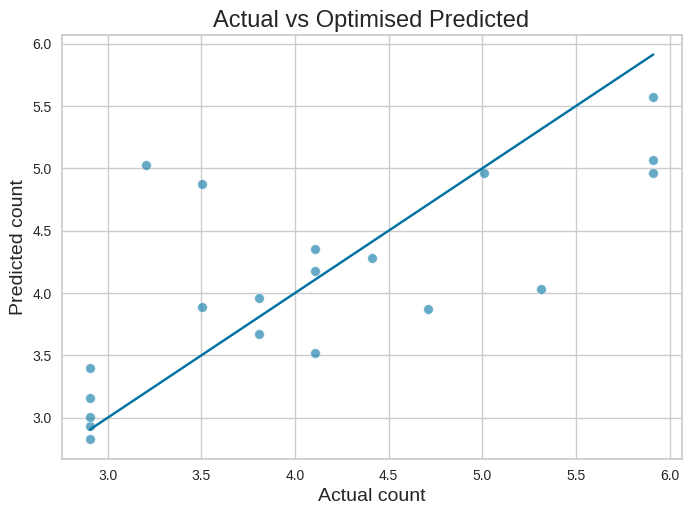

In [ ]:
sns.scatterplot(x=Y_test, y=Y_test_optimised, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.savefig('SVR_H_Test.png')
plt.show()


In [ ]:
grid.score(X_test, Y_test)

0.5251097067263388

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_optimised)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

0.71

In [ ]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test_optimised))

The testing r_sq is: 0.6622


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_optimised))

The MAE is: 0.5070


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_optimised)))

The RMSE is: 0.7141


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_optimised))

The EVS is: 0.5253


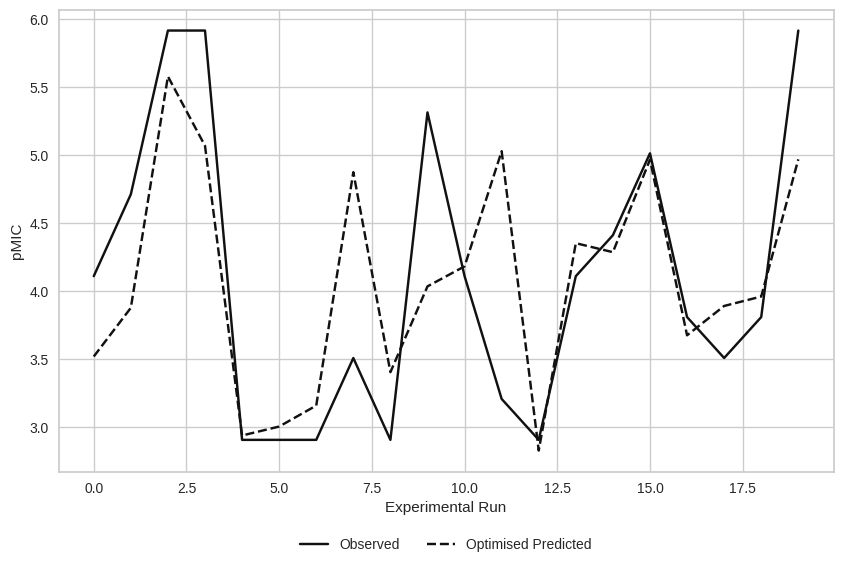

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('pMIC')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.savefig('SVR_op_test.png')

**Train with hyperparameters**

In [ ]:
Y_train_optimised = grid.predict(X_train)

In [ ]:
Y_train_optimised

array([5.21142955, 3.0030513 , 3.60518131, 4.20723013, 3.17077543,
       4.91023705, 5.11075076, 2.93519043, 4.20721742, 3.00300313,
       5.81360933, 3.30439559, 4.00698146, 3.30431713, 3.90639977,
       2.80315338, 2.80281582, 3.90647773, 4.19080197, 5.81381035,
       4.60938482, 5.21135775, 2.80287155, 3.90650046, 5.81325351,
       3.90642865, 3.90601681, 2.80278964, 3.48321331, 2.80260953,
       5.51277888, 4.20730153, 3.2946829 , 5.11055031, 5.81368811,
       3.00296395, 3.90595351, 3.3042376 , 4.11465838, 3.60528824,
       5.21194029, 3.10377977, 3.30430333, 3.60559691, 3.46034368,
       3.00309886, 3.00268096, 5.21158733, 4.80973477, 5.81368758,
       4.06413373, 3.3044309 , 3.00326879, 3.00310464, 3.30387508,
       3.90609154, 5.81388498, 4.30813353, 2.80296475, 5.81348911,
       3.30391749, 3.30365987, 2.80278659, 4.91038653, 5.81357537,
       3.90653828, 3.60523843, 3.30443984, 5.81338796, 3.30418885,
       3.21952962, 3.00328416, 3.60554479, 3.90540623, 4.30841

In [ ]:
predictions1['Y_train_optimised'] = Y_train_optimised
predictions1.head()

,Y_train,Y_train_pred,Y_train_optimised
49,5.311580,4.587377,5.211430
70,2.903090,3.003191,3.003051
68,3.505150,3.546304,3.605181
15,4.107238,4.007575,4.207230
39,3.204120,3.304475,3.170775


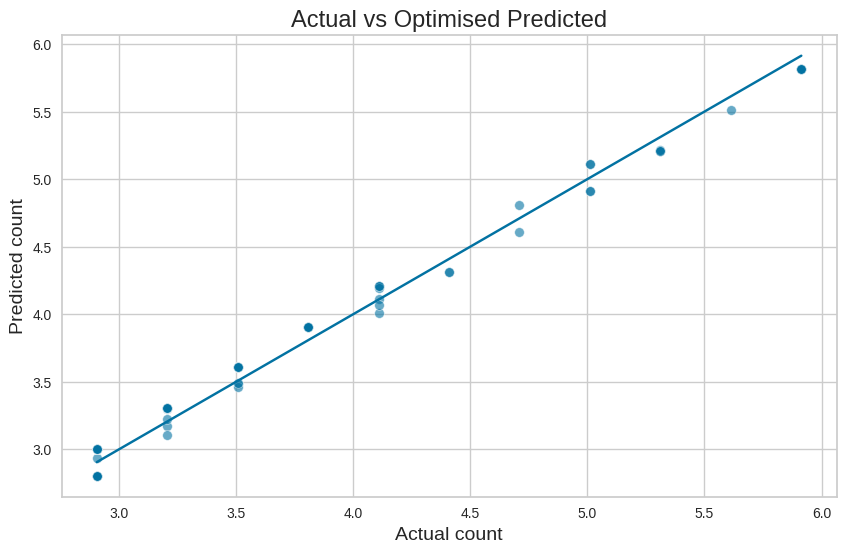

In [ ]:
sns.scatterplot(x=Y_train, y=Y_train_optimised, alpha=0.6)
sns.lineplot(x=Y_train, y=Y_train)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.savefig('SVR_H_Train.png')
plt.show()


In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train_optimised))

The training r_sq is: 0.8055


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_optimised))

The MAE is: 0.0921


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_optimised)))

The RMSE is: 0.0949


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_optimised))

The EVS is: 0.9917


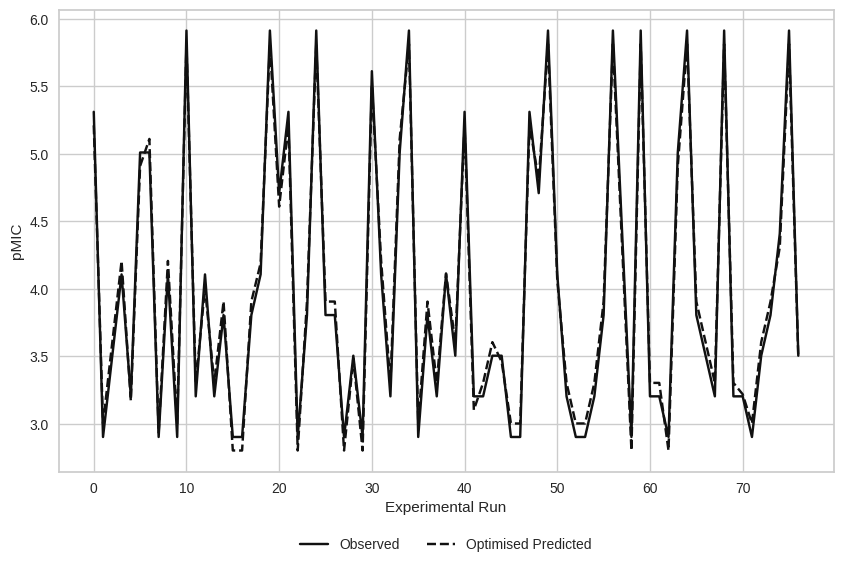

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('pMIC')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.savefig('SVR_op_Train.png')

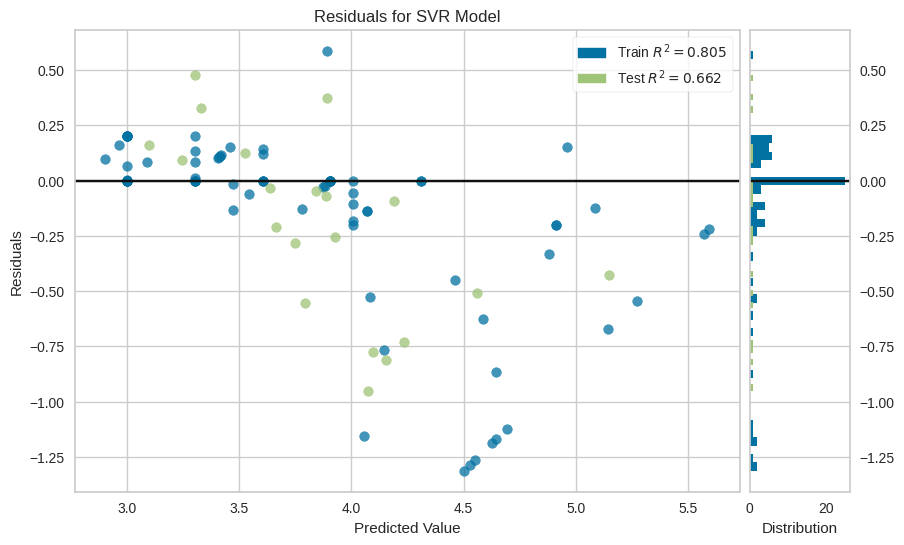

<Axes: title={'center': 'Residuals for SVR Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train_optimised)
visualizer.score(X_test, Y_test_optimised)
visualizer.poof()


In [ ]:
features = list(X.columns)

In [ ]:
features

['MIC_Value',
 'apol',
 'nAtom',
 'ATS2p',
 'AATS1m',
 'ATSC4p',
 'ATSC7i',
 'ATSC2s',
 'ATSC5s',
 'AATSCm',
 'AATSC7m',
 'AATSC8m',
 'AATSC1v',
 'AATSC6v',
 'AATSC8v',
 'AATSC8p',
 'AATSC5i',
 'AATSC7s',
 'MATS3v',
 'MATS5e',
 'MATS6s',
 'GATS7s',
 'SpAbs_DzZ',
 'SpAbs_Dzm',
 'SpDiam_Dzp',
 'EE_Dzs',
 'nBondsS',
 'nBondsS3',
 'C1SP3',
 'SPC-6',
 'Sse',
 'SpMax_Dt',
 'EE_Dt',
 'VE1_Dt',
 'VR3_Dt',
 'SHBint4',
 'SHBint1',
 'SdO',
 'minHBint4',
 'minHBint1',
 'minaaN',
 'maxHBint1',
 'maxaaN',
 'ETA_Beta_ns',
 'nAtomLC',
 'nAtomP',
 'MPC3',
 'SpMAD_D',
 'WTPT-1',
 'PubchemFP2',
 'PubchemFP516']

In [ ]:
model.fit(X_train, Y_train)

SVR()